In [17]:
# Import
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)

In [18]:
# Lettura dei risultati
dfRisultati = pd.read_csv('Risultati.csv')

# Eliminazione righe nulle
dfRisultati = dfRisultati[dfRisultati['Squadra'].notnull()]

# Cambio dei nomi delle colonne
columns = dfRisultati.columns
newnames = []
for index, c in enumerate(columns):
    if c[:8] != 'Unnamed:':
        newnames.append(c)
        
newnames = newnames[1:]
newnames = ['Squadra'] + [x+ndx for x in newnames for ndx in ('', '2','3')]

dfRisultati.columns = newnames
dfRisultati.to_csv('TabellaRisultati.csv')
display(dfRisultati)

,Squadra,ASCOLI,ASCOLI2,ASCOLI3,BASKET GIOVANE,BASKET GIOVANE2,BASKET GIOVANE3,FALCONARA,FALCONARA2,FALCONARA3,...,SPOLETO3,TOLENTINO,TOLENTINO2,TOLENTINO3,UMBERTIDE,UMBERTIDE2,UMBERTIDE3,URBANIA,URBANIA2,URBANIA3
0,ASCOLI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.00,52.00,89.00,11.00,76.00,64.00,NaN,NaN,NaN
1,BASKET GIOVANE,8.00,71.00,89.00,NaN,NaN,NaN,NaN,NaN,NaN,...,59.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FALCONARA,NaN,NaN,NaN,5.00,72.00,64.00,NaN,NaN,NaN,...,NaN,10.00,77.00,67.00,NaN,NaN,NaN,12.00,63.00,69.00
3,FOSSOMBRONE,4.00,80.00,70.00,11.00,81.00,52.00,NaN,NaN,NaN,...,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GUALDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,67.00,81.00
5,LORETO,NaN,NaN,NaN,1.00,105.00,45.00,6.00,86.00,61.00,...,NaN,NaN,NaN,NaN,4.00,103.00,45.00,8.00,94.00,67.00
6,OSIMO,12.00,88.00,84.00,NaN,NaN,NaN,NaN,NaN,NaN,...,69.00,8.00,84.00,71.00,7.00,100.00,64.00,NaN,NaN,NaN
7,P.S. GIORGIO,NaN,NaN,NaN,NaN,NaN,NaN,4.00,88.00,66.00,...,NaN,NaN,NaN,NaN,2.00,84.00,51.00,6.00,62.00,71.00
8,PERUGIA,6.00,85.00,72.00,NaN,NaN,NaN,NaN,NaN,NaN,...,49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,RECANATI,NaN,NaN,NaN,NaN,NaN,NaN,2.00,85.00,68.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,73.00,55.00


In [19]:
# Nomi delle squadre
squadre = dfRisultati['Squadra'].unique()

# Estrazione delle statistiche di squadra ad una determinata giornata
def EstraiStats(finoallagiornata=999):
    # Raccolta informazioni su ciascuna squadra
    partite_totali  = []
    partite_casa    = []
    partite_fuori   = []
    vittorie_totali = []
    vittorie_casa   = []
    vittorie_fuori  = []
    difcan_totali   = []
    difcan_casa     = []
    difcan_fuori    = []
    segnati_totali  = []
    segnati_casa    = []
    segnati_fuori   = []
    subiti_totali   = []
    subiti_casa     = []
    subiti_fuori    = []

    for s in squadre:
        pt = 0
        pc = 0
        pf = 0
        vt = 0
        vc = 0
        vf = 0
        dt = 0
        dc = 0
        df = 0
        st = 0
        sc = 0
        sf = 0
        ut = 0
        uc = 0
        uf = 0

        # Ciclo sulle partite in casa
        dfs = dfRisultati[dfRisultati['Squadra']==s]
        for a in squadre:
            dfcasa = dfs[dfs[a].notnull()][[a, a+'2',a+'3']]
            if dfcasa.shape[0] > 0:
                punteggio = list(dfcasa.iloc[0])
                giornata = punteggio[0]
                if giornata <= finoallagiornata:
                    pt += 1
                    pc += 1
                    ps = punteggio[1]
                    pa = punteggio[2]
                    st += ps
                    sc += ps
                    ut += pa
                    uc += pa
                    dt += ps - pa
                    dc += ps - pa
                    if ps > pa:
                        vt += 1
                        vc += 1

        # Ciclo sulle partite in trasferta
        dfs = dfRisultati[dfRisultati[s].notnull()][['Squadra',s,s+'2',s+'3']]
        for index, row in dfs.iterrows():
            giornata = row[s]
            if giornata <= finoallagiornata:
                a = row['Squadra']
                pa = row[s+'2']
                ps = row[s+'3']
                st += ps
                sf += ps
                ut += pa
                uf += pa
                pt += 1
                pf += 1
                dt += ps - pa
                df += ps - pa
                if ps > pa:
                    vt += 1
                    vf += 1

        partite_totali.append(pt)
        partite_casa.append(pc)
        partite_fuori.append(pf)
        vittorie_totali.append(vt)
        vittorie_casa.append(vc)
        vittorie_fuori.append(vf)
        difcan_totali.append(dt)
        difcan_casa.append(dc)
        difcan_fuori.append(df)
        segnati_totali.append(st)
        segnati_casa.append(sc)
        segnati_fuori.append(sf)
        subiti_totali.append(ut)
        subiti_casa.append(uc)
        subiti_fuori.append(uf)
        
    # Creazione del DataFrame delle statistiche di squadra
    dfStats = pd.DataFrame({'Squadra'       : squadre,
                            'PartiteTotali' : partite_totali,
                            'PartiteCasa'   : partite_casa,
                            'PartiteFuori'  : partite_fuori,
                            'VittorieTotali': vittorie_totali,
                            'VittorieCasa'  : vittorie_casa,
                            'VittorieFuori' : vittorie_fuori,
                            'DifCanTotali'  : difcan_totali,
                            'DifCanCasa'    : difcan_casa,
                            'DifCanFuori'   : difcan_fuori,
                            'SegnatiTotali' : segnati_totali,
                            'SegnatiCasa'   : segnati_casa,
                            'SegnatiFuori'  : segnati_fuori,
                            'SubitiTotali'  : subiti_totali,
                            'SubitiCasa'    : subiti_casa,
                            'SubitiFuori'   : subiti_fuori,
                            'Punti'         : [x*2 for x in vittorie_totali]
                          })

    # Conversione di tutte le colonne numeriche ad intere
    m = dfStats.select_dtypes(np.number)
    dfStats[m.columns] = m.round().astype('Int64')
    
    # Medie segnati e subiti
    dfStats['MediaSegnatiTotali'] = dfStats['SegnatiTotali'] / dfStats['PartiteTotali']
    dfStats['MediaSegnatiCasa']   = dfStats['SegnatiCasa']   / dfStats['PartiteCasa']
    dfStats['MediaSegnatiFuori']  = dfStats['SegnatiFuori']  / dfStats['PartiteFuori']
    
    dfStats['MediaSubitiTotali'] = dfStats['SubitiTotali'] / dfStats['PartiteTotali']
    dfStats['MediaSubitiCasa']   = dfStats['SubitiCasa']   / dfStats['PartiteCasa']
    dfStats['MediaSubitiFuori']  = dfStats['SubitiFuori']  / dfStats['PartiteFuori']

    # Differenza Canestri media
    dfStats['MediaDifCanTotali'] = dfStats['DifCanTotali'] / dfStats['PartiteTotali']
    dfStats['MediaDifCanCasa']   = dfStats['DifCanCasa']   / dfStats['PartiteCasa']
    dfStats['MediaDifCanFuori']  = dfStats['DifCanFuori']  / dfStats['PartiteFuori']
    
    # Percentuale vittorie per turno
    dfStats['PercVittorieTotali'] = 100.0 * dfStats['VittorieTotali'] / dfStats['PartiteTotali']
    dfStats['PercVittorieCasa']   = 100.0 * dfStats['VittorieCasa']   / dfStats['PartiteCasa']
    dfStats['PercVittorieFuori']  = 100.0 * dfStats['VittorieFuori']  / dfStats['PartiteFuori']
    
    # Ordinamento per classifica
    dfStats = dfStats.sort_values(['Punti', 'DifCanTotali'], ascending=[False, False])
    
    # Index su squadra
    dfStats = dfStats.reset_index().set_index('Squadra')

    # Index sulla posizione partendo da 1
    dfStats = dfStats.reset_index()
    dfStats.index += 1 
    
    return dfStats

In [20]:
# Classifica attuale nel formato BasketMarche
dfStats = EstraiStats()
dfClassifica = dfStats[['Squadra','Punti','PartiteTotali','VittorieTotali', 'SegnatiTotali', 'SubitiTotali', 'DifCanTotali', 'MediaSegnatiTotali', 'MediaSubitiTotali']]
dfClassifica = dfClassifica.rename(columns = {'Punti':'Pt', 'PartiteTotali': 'G', 'VittorieTotali': 'V',
                                              'SegnatiTotali': 'Pse', 'SubitiTotali': 'Psu', 'DifCanTotali': 'D',
                                              'MediaSegnatiTotali': 'Mse', 'MediaSubitiTotali': 'Msu'})
dfClassifica['P'] = dfClassifica['G'] - dfClassifica['V']
dfClassifica = dfClassifica[['Squadra','Pt','G','V','P','Pse','Psu','Mse','Msu','D']]
dfClassifica.index.name = 'Posizione'
dfClassifica.to_csv('Classifica.csv')
dfClassifica

,Squadra,Pt,G,V,P,Pse,Psu,Mse,Msu,D
Posizione,,,,,,,,,,
1,LORETO,22,11,11,0,945,580,85.91,52.73,365
2,URBANIA,18,11,9,2,817,716,74.27,65.09,101
3,FOSSOMBRONE,16,12,8,4,936,783,78.00,65.25,153
4,PERUGIA,16,12,8,4,877,815,73.08,67.92,62
5,RECANATI,14,12,7,5,884,783,73.67,65.25,101
6,SAN MARINO,14,11,7,4,774,714,70.36,64.91,60
7,GUALDO,14,11,7,4,782,767,71.09,69.73,15
8,P.S. GIORGIO,10,11,5,6,796,784,72.36,71.27,12
9,OSIMO,10,11,5,6,779,807,70.82,73.36,-28


In [21]:
# Calcola la difficoltà nell'affrontare una squadra basandosi sulla posizione corrente in classifica.
# Torna un valore da 1 (ultima in classifica) a 15, prima in classifica
def DifficoltaSquadra(squadra):
    posizione = list(dfClassifica[dfClassifica['Squadra']==squadra].index)[0]
    return len(squadre) + 1 - posizione


# Estrae dai risultati tutte le partite disputate da una squadra
def TutteLePartite(squadra):
    partite = []
    # Ciclo sulle partite in casa
    dfs = dfRisultati[dfRisultati['Squadra']==squadra]
    for a in squadre:
        dfcasa = dfs[dfs[a].notnull()][[a, a+'2',a+'3']]
        if dfcasa.shape[0] > 0:
            punteggio = list(dfcasa.iloc[0])
            giornata       = int(punteggio[0])
            puntisquadra   = int(punteggio[1])
            puntiavversari = int(punteggio[2])
            difficolta = DifficoltaSquadra(a)
            partite.append((squadra,True,giornata,a,puntisquadra,puntiavversari,difficolta))
            
    # Ciclo sulle partite in trasferta
    dfs = dfRisultati[dfRisultati[squadra].notnull()][['Squadra',squadra,squadra+'2',squadra+'3']]
    for index, row in dfs.iterrows():
        avversario = row['Squadra']
        giornata       = int(row[squadra])
        puntisquadra   = int(row[squadra+'3'])
        puntiavversari = int(row[squadra+'2'])
        difficolta = DifficoltaSquadra(avversario) * 1.25
        partite.append((squadra,False,giornata,avversario,puntisquadra,puntiavversari,difficolta))
            
    return sorted(partite,  key=lambda x: x[2])


elenco_partite = {}
for s in squadre:
    elenco_partite[s] = TutteLePartite(s)

    
# Torna la difficolta media delle partite affrontate da una squadra fino ad una determinata giornata    
def difficoltaMedia(squadra, giornata):
    partite = [x for x in elenco_partite[squadra] if x[2] <= giornata]
    casa      = [x[6] for x in partite if x[1]]
    trasferta = [x[6] for x in partite if not x[1]]
    if len(partite) > 0:
        return (sum(casa) + sum(trasferta))/float(len(partite))
    else:
        return 0


# Estrazione dei dati su tutte le giornate disputate fino ad ora

# Numero giornate disputate
numerogiornate = int(dfRisultati[squadre].fillna(0).to_numpy().max())

dfStats = None
for n in range(1,numerogiornate+1):
    dfStatsG = EstraiStats(n)
    dfStatsG.columns = ['Squadra'] + [x+str(n) for x in dfStatsG.columns if x != 'Squadra']
    dfStatsG = dfStatsG.drop('index'+str(n), axis=1)
    
    dfStatsG['Difficolta'+str(n)] = [difficoltaMedia(s,n) for s in dfStatsG['Squadra']]
        
    if dfStats is None:
        dfStats = dfStatsG
    else:
        dfStats = pd.merge(dfStats, dfStatsG,  how='left', left_on=['Squadra'], right_on=['Squadra'])


# Ordinamento per classifica
dfStats = dfStats.sort_values(['Punti'+str(numerogiornate), 'DifCanTotali'+str(numerogiornate)], ascending=[False, False])

# Index sulla posizione partendo da 1
dfStats = dfStats.reset_index()
dfStats.index += 1 

dfStats = dfStats.drop('index', axis=1)
dfStats

,Squadra,PartiteTotali1,PartiteCasa1,PartiteFuori1,VittorieTotali1,VittorieCasa1,VittorieFuori1,DifCanTotali1,DifCanCasa1,DifCanFuori1,...,MediaSubitiTotali12,MediaSubitiCasa12,MediaSubitiFuori12,MediaDifCanTotali12,MediaDifCanCasa12,MediaDifCanFuori12,PercVittorieTotali12,PercVittorieCasa12,PercVittorieFuori12,Difficolta12
1,LORETO,1,1,0,1,1,0,60,60,0,...,52.73,57.17,47.40,33.18,33.00,33.40,100.00,100.00,100.00,7.34
2,URBANIA,1,1,0,1,1,0,30,30,0,...,65.09,59.60,69.67,9.18,18.00,1.83,81.82,100.00,66.67,9.80
3,FOSSOMBRONE,1,0,1,1,0,1,32,0,32,...,65.25,58.20,70.29,12.75,27.20,2.43,66.67,100.00,42.86,9.52
4,PERUGIA,1,0,1,1,0,1,10,0,10,...,67.92,62.20,72.00,5.17,13.80,-1.00,66.67,80.00,57.14,8.81
5,RECANATI,1,0,1,1,0,1,23,0,23,...,65.25,68.40,63.00,8.42,7.60,9.00,58.33,60.00,57.14,8.44
6,SAN MARINO,1,0,1,0,0,0,-30,0,-30,...,64.91,63.75,65.57,5.45,7.75,4.14,63.64,75.00,57.14,10.32
7,GUALDO,1,0,1,1,0,1,10,0,10,...,69.73,71.60,68.17,1.36,-4.40,6.17,63.64,40.00,83.33,9.59
8,P.S. GIORGIO,0,0,0,0,0,0,0,0,0,...,71.27,69.67,73.20,1.09,7.50,-6.60,45.45,66.67,20.00,8.82
9,OSIMO,1,1,0,0,0,0,-23,-23,0,...,73.36,75.00,70.50,-2.55,0.57,-8.00,45.45,57.14,25.00,8.11
10,TOLENTINO,1,0,1,1,0,1,37,0,37,...,69.82,68.50,71.40,-4.36,-11.33,4.00,36.36,16.67,60.00,8.64


In [22]:
def EstraiTimeline(dfStats, numerogiornate, nomecampo):
    # Lista delle colonne dei punti di tutte le giornate
    colonne = [nomecampo+str(x+1) for x in range(numerogiornate)]
    renamed = [str(x+1) for x in range(numerogiornate)]

    # Evoluzione dei punti nelle giornate  --> Grafico
    return dfStats[['Squadra']+colonne].rename(columns = dict(zip(colonne,renamed)))
    

#dfTimeline = EstraiTimeline(dfStats, numerogiornate, 'Punti')
#dfTimeline = EstraiTimeline(dfStats, numerogiornate, 'DifCanTotali')
#dfTimeline = EstraiTimeline(dfStats, numerogiornate, 'MediaSubitiTotali')
dfTimeline = EstraiTimeline(dfStats, numerogiornate, 'PercVittorieTotali')
dfTimeline = dfTimeline.fillna(0.0)  # Non funziona!
#dfTimeline = dfTimeline.replace(np.nan, 0)  # Non funziona!
dfTimeline

,Squadra,1,2,3,4,5,6,7,8,9,10,11,12
1,LORETO,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2,URBANIA,100.00,100.00,100.00,75.00,80.00,83.33,85.71,75.00,75.00,77.78,80.00,81.82
3,FOSSOMBRONE,100.00,100.00,66.67,75.00,60.00,66.67,71.43,75.00,77.78,70.00,72.73,66.67
4,PERUGIA,100.00,100.00,100.00,100.00,80.00,83.33,85.71,75.00,66.67,70.00,63.64,66.67
5,RECANATI,100.00,100.00,100.00,100.00,100.00,83.33,71.43,62.50,66.67,60.00,63.64,58.33
6,SAN MARINO,0.00,50.00,66.67,75.00,80.00,83.33,71.43,62.50,66.67,60.00,60.00,63.64
7,GUALDO,100.00,50.00,66.67,50.00,60.00,50.00,57.14,62.50,66.67,70.00,63.64,63.64
8,P.S. GIORGIO,NaN,100.00,100.00,100.00,75.00,60.00,50.00,57.14,50.00,55.56,50.00,45.45
9,OSIMO,0.00,0.00,0.00,25.00,20.00,20.00,33.33,42.86,37.50,44.44,40.00,45.45
10,TOLENTINO,100.00,50.00,33.33,33.33,25.00,40.00,33.33,28.57,25.00,22.22,30.00,36.36


In [23]:
dfTimeline = EstraiTimeline(dfStats, numerogiornate, 'Difficolta')
dfTimeline

,Squadra,1,2,3,4,5,6,7,8,9,10,11,12
1,LORETO,2.00,4.75,4.75,4.17,5.31,5.25,4.58,5.93,5.81,6.28,6.78,7.34
2,URBANIA,10.00,10.62,11.42,12.00,12.00,11.67,10.29,11.34,11.34,10.50,10.15,9.80
3,FOSSOMBRONE,6.25,3.62,8.25,7.19,8.25,8.38,8.25,8.94,9.28,9.35,8.68,9.52
4,PERUGIA,3.75,5.38,5.67,4.50,7.10,6.58,7.43,7.62,8.58,8.82,8.70,8.81
5,RECANATI,8.75,6.88,5.00,7.25,6.80,7.33,7.89,8.53,8.42,9.07,8.98,8.44
6,SAN MARINO,17.50,10.75,9.67,10.06,10.65,11.17,11.29,11.12,10.11,10.97,10.97,10.32
7,GUALDO,1.25,7.62,6.75,7.56,7.55,9.00,9.29,10.00,9.78,9.05,9.59,9.59
8,P.S. GIORGIO,0.00,3.00,5.88,5.58,4.50,6.40,6.17,6.71,7.28,7.92,8.50,8.82
9,OSIMO,11.00,13.00,11.33,9.12,10.30,10.30,9.08,8.64,8.34,7.53,8.53,8.11
10,TOLENTINO,5.00,10.00,10.00,10.00,9.75,8.55,9.29,9.21,9.44,9.08,9.38,8.64


In [24]:
'''
Idee per i grafici

timeline punti in classifica
timeline punti segnati totali/casa/fuori
timeline punti subiti totali/casa/fuori
timeline percentuale vittorie totali/casa/fuori
'''

'\nIdee per i grafici\n\ntimeline punti in classifica\ntimeline punti segnati totali/casa/fuori\ntimeline punti subiti totali/casa/fuori\ntimeline percentuale vittorie totali/casa/fuori\n'

In [25]:
import plotly.express as px
import plotly.graph_objects as go

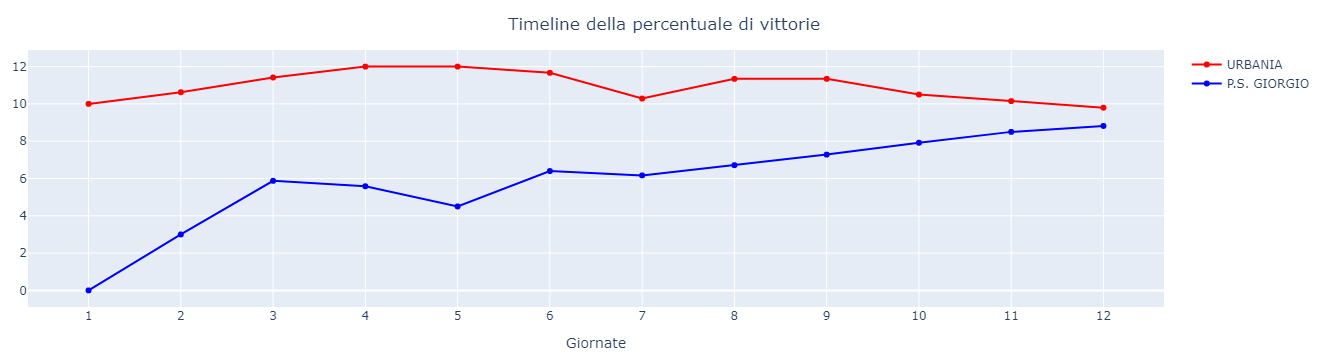

In [26]:
# Aggiunge un line chart per una squadra
def addTrace(fig, dfTimeline, squadra, color='red'):
    df = dfTimeline[dfTimeline['Squadra']==squadra]
    df.set_index('Squadra')
    fig.add_traces(go.Scatter(x=df.columns[1:],
                              y=df.values.flatten().tolist()[1:], 
                              mode='lines+markers',
                              line=dict(color=color),
                              name=squadra))

# Crea un chart con una o più squadre
fig = go.Figure()
addTrace(fig,dfTimeline, 'URBANIA',      'red')
addTrace(fig,dfTimeline, 'P.S. GIORGIO', 'blue')
fig.update_layout(margin=dict(l=20, r=20, t=50, b=20),
                  height=300,
                  title={'text': "Timeline della percentuale di vittorie", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title="Giornate",)
fig.show()

In [27]:
len(squadre)

15

In [28]:
# Display di una lista di partite di una squadra
def displayPartite(partite, titolo=''):
    size = 3
    font = 'arial'
    html = '<table>'
    style  = ' style="text-align: left; padding-top: 3px; padding-bottom: 3px; padding-left: 1px; padding-right: 1px;"'
    styleR = ' style="text-align: right; padding-top: 3px; padding-bottom: 3px; padding-left: 1px; padding-right: 1px;"'
    stylew1 = style + ' width="300px;"'
    stylew2 = style + ' width="90px;"'
    stylelarge = ' style="text-align: left; padding-top: 3px; padding-bottom: 3px; padding-left: 20px; padding-right: 20px;"'
    html += '<tr>'
    html += '<th%s colspan="3"><font size="%d" face="%s" color="black">Giornata</font></th>' % (style,size,font)
    html += '<th%s colspan="4"><font size="%d" face="%s" color="black">%s</font></th>' % (stylew1,size,font,titolo)
    html += '<th%s colspan="4"><font size="%d" face="%s" color="black">Risultato</font></th>' % (stylew2,size,font)
    html += '<th%s colspan="3"><font size="%d" face="%s" color="black">Scarto</font></th>' % (style,size,font)
    html += '<th%s colspan="3"><font size="%d" face="%s" color="black">Difficoltà</font></th>' % (styleR,size,font)
    html += '</tr>'
    totdifficolta = 0
    for p in partite:
        squadra,incasa,giornata,avversario,puntisquadra,puntiavversario,difficolta = p
        vinta = puntisquadra > puntiavversario
        if vinta:
            color = 'green'
        else:
            color = 'red'
        html += '<tr>'
        html += '<td%s><font size="%d" face="%s" color="black">%d.a</font></td>' % (style,size,font,giornata)
        html += '<td%s></td>' % (stylelarge)
        html += '<td%s></td>' % (stylelarge)
        if incasa:
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,color,squadra)
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,'black','-')
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,color,avversario)
            html += '<td%s></td>' % (stylelarge)
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',puntisquadra)
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,'black','-')
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',puntiavversario)
            html += '<td%s></td>' % (stylelarge)
            if vinta: html += '<td%s>+</td>' % (style)
            else:     html += '<td%s>-</td>' % (style)
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',abs(puntisquadra-puntiavversario))
        else:
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,color,avversario)
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,'black','-')
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,color,squadra)
            html += '<td%s></td>' % (stylelarge)
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',puntiavversario)
            html += '<td%s><font size="%d" face="%s" color="%s">%s</font></td>' % (style,size,font,'black','-')
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',puntisquadra)
            html += '<td%s></td>' % (stylelarge)
            if vinta: html += '<td%s>+</td>' % (style)
            else:     html += '<td%s>-</td>' % (style)
            html += '<td%s><font size="%d" face="%s" color="%s">%d</font></td>' % (style,size,font,'black',abs(puntisquadra-puntiavversario))
            
        html += '<td%s></td>' % (stylelarge)
        html += '<td%s></td>' % (stylelarge)
        html += '<td%s><font size="%d" face="%s" color="%s">%.2f</font></td>' % (styleR,size,font,'black',difficolta)
        html += '<td%s></td>' % (stylelarge)
        
        html += '</tr>'
        
        totdifficolta += difficolta
    html += '</table>'
    
    html = html.replace('Difficoltà','Difficoltà   %.2f'%totdifficolta)
    return html
    

# Per le prime 10 squadre in classifica
prime10 = list(dfClassifica['Squadra'])[:10]
for squadra in prime10:
    display(HTML(displayPartite(TutteLePartite(squadra),squadra)))